In [1]:
import os
import numpy as np
from osgeo import gdal
import matplotlib.pyplot as plt

In [2]:
def load_tif_image(tif_path):
    gdal_header = gdal.Open(str(tif_path))
    return gdal_header.ReadAsArray()

In [7]:
# INPE Data

inpe_path = 'data/IBAMA_INPE/25K/INPE/tiff'
img_names = os.listdir(inpe_path)
print(len(img_names))
# img_names.sort()

345


In [10]:
mask = load_tif_image(os.path.join(inpe_path, 'mask.tif'))
print(mask.shape)

img_arcs = load_tif_image(os.path.join(inpe_path, 'ArCS160320.tif'))
print(img_arcs.shape)

(98, 136)
(98, 136)


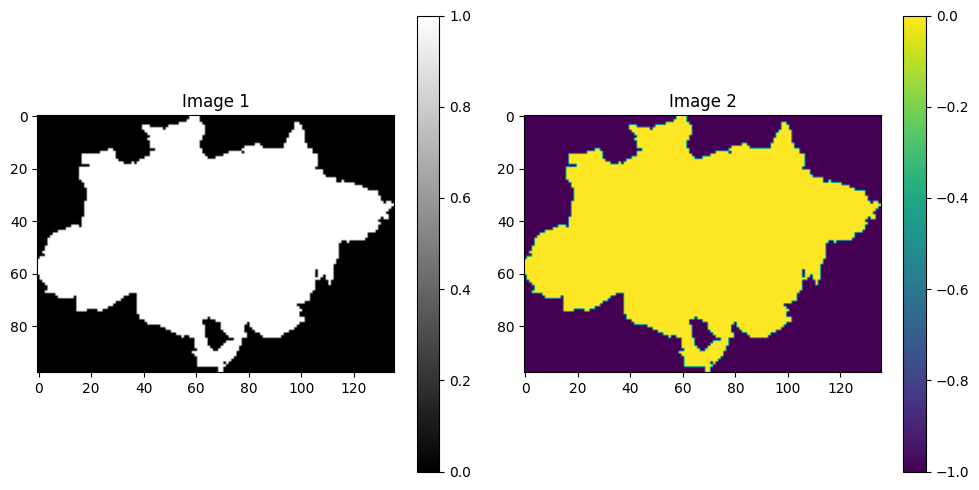

In [12]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(mask, cmap='gray')
plt.title('Image 1')
plt.colorbar()

plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.imshow(img_arcs)
plt.title('Image 2')
plt.colorbar()

plt.tight_layout()
plt.show()

In [8]:
arcs_files = list(filter(lambda x: 'ArCS' in x, img_names))
arcs_files.remove('ArCS.tif')
dear_files = list(filter(lambda x: 'DeAr' in x, img_names))
dear_files.remove('DeAr.tif')
print(len(arcs_files), len(dear_files))
data_files = arcs_files

82 79


In [10]:
import pandas as pd
data_files.sort()
print(data_files)
func = lambda x: x.split('.tif')[0][4:]
date_files = [func(file) for file in data_files]
print(date_files)
df_date = pd.DataFrame(date_files, columns=['date_str'])


['ArCS010118.tif', 'ArCS010119.tif', 'ArCS010120.tif', 'ArCS010218.tif', 'ArCS010219.tif', 'ArCS010220.tif', 'ArCS010317.tif', 'ArCS010318.tif', 'ArCS010319.tif', 'ArCS010320.tif', 'ArCS010417.tif', 'ArCS010418.tif', 'ArCS010419.tif', 'ArCS010420.tif', 'ArCS010517.tif', 'ArCS010518.tif', 'ArCS010519.tif', 'ArCS010520.tif', 'ArCS010617.tif', 'ArCS010618.tif', 'ArCS010619.tif', 'ArCS010620.tif', 'ArCS010717.tif', 'ArCS010718.tif', 'ArCS010719.tif', 'ArCS010720.tif', 'ArCS010817.tif', 'ArCS010818.tif', 'ArCS010819.tif', 'ArCS010820.tif', 'ArCS010917.tif', 'ArCS010918.tif', 'ArCS010919.tif', 'ArCS010920.tif', 'ArCS011017.tif', 'ArCS011018.tif', 'ArCS011019.tif', 'ArCS011020.tif', 'ArCS011117.tif', 'ArCS011118.tif', 'ArCS011119.tif', 'ArCS011120.tif', 'ArCS011217.tif', 'ArCS011218.tif', 'ArCS011219.tif', 'ArCS011220.tif', 'ArCS160118.tif', 'ArCS160119.tif', 'ArCS160120.tif', 'ArCS160218.tif', 'ArCS160219.tif', 'ArCS160220.tif', 'ArCS160317.tif', 'ArCS160318.tif', 'ArCS160319.tif', 'ArCS1603

In [11]:
df_date['date'] = pd.to_datetime(df_date['date_str'], format="%d%m%y")

In [12]:
df_date.head(10)
df_date = df_date.sort_values(by='date')
df_date.head(10)

,date_str,date
6,010317,2017-03-01
52,160317,2017-03-16
10,010417,2017-04-01
56,160417,2017-04-16
14,010517,2017-05-01
60,160517,2017-05-16
18,010617,2017-06-01
64,160617,2017-06-16
22,010717,2017-07-01
68,160717,2017-07-16


In [15]:
def sliding_window(input_list, window_size):
    result = []
    for i in range(len(input_list) - window_size + 1):
        window = input_list[i:i + window_size]
        result.append(window)
    return result

date_windows = sliding_window(df_date.date, 3)
print(len(date_windows))
print(date_windows)

90
[6    2017-03-01
52   2017-03-16
10   2017-04-01
Name: date, dtype: datetime64[ns], 52   2017-03-16
10   2017-04-01
56   2017-04-16
Name: date, dtype: datetime64[ns], 10   2017-04-01
56   2017-04-16
14   2017-05-01
Name: date, dtype: datetime64[ns], 56   2017-04-16
14   2017-05-01
60   2017-05-16
Name: date, dtype: datetime64[ns], 14   2017-05-01
60   2017-05-16
18   2017-06-01
Name: date, dtype: datetime64[ns], 60   2017-05-16
18   2017-06-01
64   2017-06-16
Name: date, dtype: datetime64[ns], 18   2017-06-01
64   2017-06-16
22   2017-07-01
Name: date, dtype: datetime64[ns], 64   2017-06-16
22   2017-07-01
68   2017-07-16
Name: date, dtype: datetime64[ns], 22   2017-07-01
68   2017-07-16
26   2017-08-01
Name: date, dtype: datetime64[ns], 68   2017-07-16
26   2017-08-01
72   2017-08-16
Name: date, dtype: datetime64[ns], 26   2017-08-01
72   2017-08-16
30   2017-09-01
Name: date, dtype: datetime64[ns], 72   2017-08-16
30   2017-09-01
76   2017-09-16
Name: date, dtype: datetime64[ns], 

In [19]:
for img_name in img_names:
    print(img_name)
    break
    # img_trial_path = os.path.join(inpe_path, img_name)
    # img_trial = load_tif_image(img_trial_path)
    # print(img_trial.shape)

DeAr161120.tif


In [20]:
img_trial_path = os.path.join(inpe_path, img_name)
img_trial = load_tif_image(img_trial_path)
print(img_trial.shape)
print(img_trial.max(), img_trial.min(), img_trial.mean())

img_trial[img_trial < -1e38] = -25

print(img_trial.max(), img_trial.min(), img_trial.mean())


(98, 136)
18.734074 -3.40282e+38 -inf
18.734074 -25.0 -11.428139


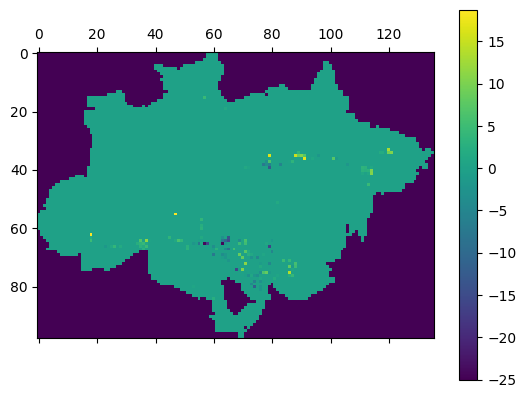

In [21]:
fig, ax = plt.subplots()
# plt.imshow(img_trial, cmap='viridis')
cax = ax.matshow(img_trial, cmap='viridis')

# Add a colorbar for reference
cbar = plt.colorbar(cax)
plt.show()

In [ ]:
for img_name in img_names:
    print(img_name)
    img_trial_path = os.path.join(inpe_path, img_name)
    img_trial = load_tif_image(img_trial_path)
    print(img_trial.shape)
    print(img_trial.max(), img_trial.min(), img_trial.mean())
    img_trial[img_trial < -1e38] = -25
    print(img_trial.max(), img_trial.min(), img_trial.mean())
    fig, ax = plt.subplots()
    # plt.imshow(img_trial, cmap='viridis')
    cax = ax.matshow(img_trial, cmap='viridis')

    # Add a colorbar for reference
    cbar = plt.colorbar(cax)
    plt.show()

In [12]:
# IBAMA Data

ibama_path = 'data/IBAMA_INPE/25K/IBAMA resampled'
img_names = os.listdir(ibama_path)
print(len(img_names))
img_names.sort()

17


In [13]:
ibama_img_path = os.path.join(ibama_path, 'access_minut_city.tiff')
ibama_img = load_tif_image(ibama_img_path)
print(ibama_img.shape)

(4, 98, 136)


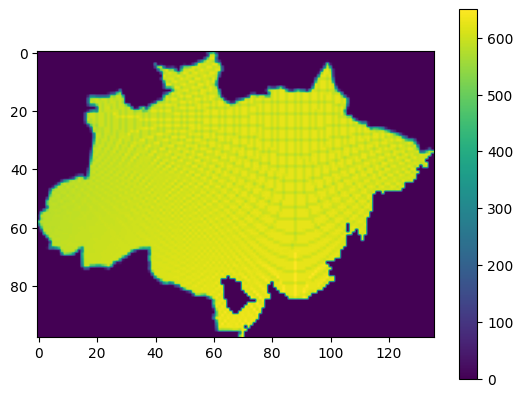

In [15]:
plt.imshow(ibama_img[0])
plt.colorbar()

# DETER

In [3]:
deter_path = 'data/DETER/deter_increments_1km.tif'

deter_img = load_tif_image(deter_path)
print(deter_img.shape)

(171, 2333, 3005)


In [4]:
ibama_img_path = 'data/IBAMA_INPE/1K/tiff_filled/Access_Minut_soy_filled.tif'
ibama_img = load_tif_image(ibama_img_path)
print(ibama_img.shape)
ibama_img[ibama_img < -1e38] = -25

(2555, 3529)


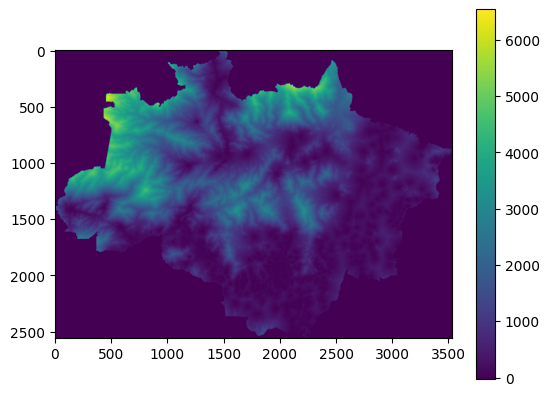

In [9]:
plt.imshow(ibama_img)
plt.colorbar()
plt.show()

In [1]:
from preprocess import load_tif_image, preprocess_patches, divide_pred_windows
import os
import numpy as np
from osgeo import gdal
import matplotlib.pyplot as plt

patch_size = 64
overlap = 0.1
deter_img = load_tif_image('data/DETER/deter_increments_1km.tif')
deter_img_train = deter_img[:72]
# xcut = (deter_img_train.shape[1] // patch_size) * patch_size
# ycut = (deter_img_train.shape[2] // patch_size) * patch_size
# deter_img_train = deter_img_train[:, :xcut, :ycut]
print(deter_img_train.shape)

mask = load_tif_image('data/IBAMA_INPE/1K/tiff_filled/mask.tif')
# xcut = (mask.shape[0] // patch_size) * patch_size
# ycut = (mask.shape[1] // patch_size) * patch_size
# mask = mask[:xcut, :ycut]
mask = mask[:deter_img_train.shape[1], :deter_img_train.shape[2]]
print(mask.shape)
# mask[mask == 0] = -1
# not_mask = np.logical_not(mask)
not_mask = mask.copy()
not_mask[not_mask == 0] = -1
not_mask[not_mask == 1] = 0

deter_img_train = deter_img_train + not_mask
print(deter_img_train.shape)

train_patches = preprocess_patches(deter_img_train, patch_size=patch_size, overlap=overlap)
del deter_img

mask_patches = preprocess_patches(mask, patch_size=patch_size, overlap=overlap)



(72, 2333, 3005)
(2333, 3005)
(72, 2333, 3005)
Extracting patches...
(72, 2333, 3005)
Patches extracted: (2080, 72, 64, 64)
Extracting patches...
(2333, 3005)
Patches extracted: (2080, 64, 64)


988


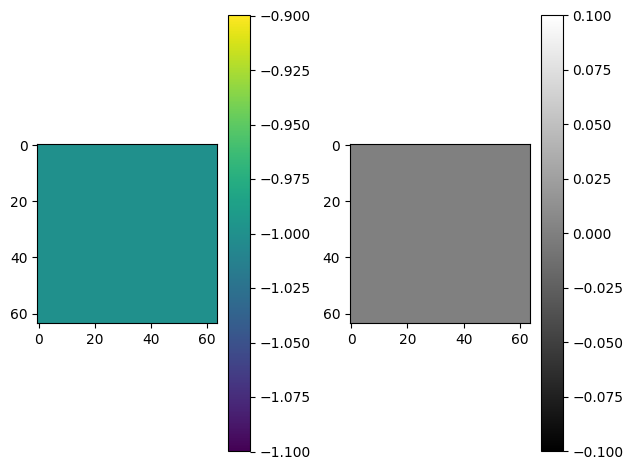

In [7]:
idx = np.random.randint(0, len(train_patches))
print(idx)
plt.subplot(1, 2, 1)
plt.imshow(train_patches[idx][0])
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(mask_patches[idx], cmap='gray')
plt.colorbar()

plt.tight_layout()
plt.show()

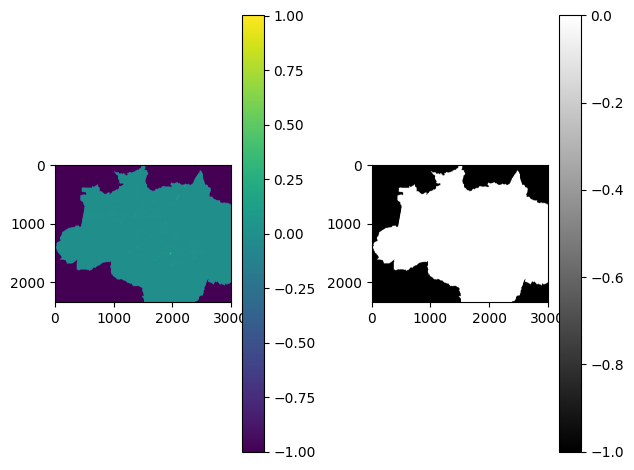

In [4]:
plt.subplot(1, 2, 1)
plt.imshow(deter_img_train[0])
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(not_mask, cmap='gray')
plt.colorbar()

plt.tight_layout()
plt.show()

In [1]:
from preprocess import load_tif_image, preprocess_patches, divide_pred_windows
import os
import numpy as np
from osgeo import gdal
import matplotlib.pyplot as plt

# patch_size = 64
# xcut = (deter_img.shape[1] // patch_size) * patch_size
# ycut = (deter_img.shape[2] // patch_size) * patch_size

# deter_img_sample = deter_img_sample[:xcut, :ycut]
deter_img = load_tif_image('data/DETER/deter_increments_1km_1week.tif')
deter_img = deter_img[:48]
print(deter_img.shape)

deter_img_sample = deter_img[0]
mask = load_tif_image('data/IBAMA_INPE/1K/tiff_filled/mask.tif')
mask = mask[:deter_img_sample.shape[0], :deter_img_sample.shape[1]]

deter_img_sample[mask == 0] = -1
print(deter_img_sample.shape)

patch_size=64

(48, 2333, 3005)
(2333, 3005)


In [24]:
idx = 0
print(deter_img[idx].mean(), deter_img[idx].max(), deter_img[idx].min())

-0.3408746259091807 0.5957586711590392 -1.0


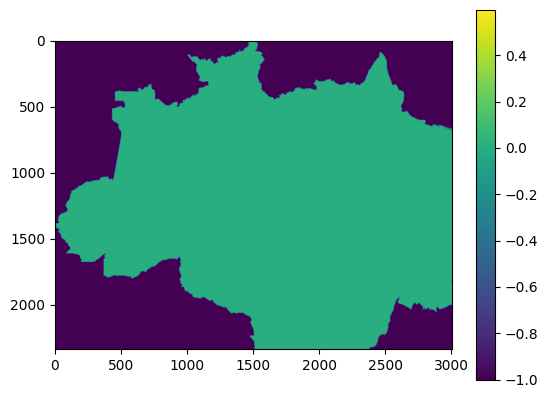

In [25]:

plt.imshow(deter_img[idx])
plt.colorbar()
plt.show()

In [2]:
# Extend the image to be divisible by the patch size
new_x = (deter_img.shape[1] // patch_size + 1) * patch_size
new_y = (deter_img.shape[2] // patch_size + 1) * patch_size
new_deter_img = np.zeros((new_x, new_y))
new_deter_img[:deter_img.shape[1], :deter_img.shape[2]] = deter_img_sample

In [3]:
def extract_sorted_patches(img, patch_size):
    patches = []
    for i in range(0, img.shape[0] - patch_size + 1, patch_size):
        for j in range(0, img.shape[1] - patch_size + 1, patch_size):
            patch = img[i:i + patch_size, j:j + patch_size]
            patches.append(patch)
    return np.stack(patches, axis=0)

In [4]:
patches = extract_sorted_patches(deter_img_sample, patch_size=64)
print(patches.shape)

(1656, 64, 64)


In [9]:
def reconstruct_sorted_patches(patches, img_shape, patch_size):
    img = np.zeros(img_shape)
    idx = 0
    for i in range(0, img_shape[0] - patch_size + 1, patch_size):
        for j in range(0, img_shape[1] - patch_size + 1, patch_size):
            print(idx, i, j)
            print(patches[idx].shape)
            print(img[i:i + patch_size, j:j + patch_size].shape)
            img[i:i + patch_size, j:j + patch_size] = patches[idx]
            idx += 1
    return img

# print(patches[:, 0].shape)
# print(new_deter_img.shape)
img_reconstructed = reconstruct_sorted_patches(patches, (2333, 3005), patch_size=64)

0 0 0
(64, 64)
(64, 64)
1 0 64
(64, 64)
(64, 64)
2 0 128
(64, 64)
(64, 64)
3 0 192
(64, 64)
(64, 64)
4 0 256
(64, 64)
(64, 64)
5 0 320
(64, 64)
(64, 64)
6 0 384
(64, 64)
(64, 64)
7 0 448
(64, 64)
(64, 64)
8 0 512
(64, 64)
(64, 64)
9 0 576
(64, 64)
(64, 64)
10 0 640
(64, 64)
(64, 64)
11 0 704
(64, 64)
(64, 64)
12 0 768
(64, 64)
(64, 64)
13 0 832
(64, 64)
(64, 64)
14 0 896
(64, 64)
(64, 64)
15 0 960
(64, 64)
(64, 64)
16 0 1024
(64, 64)
(64, 64)
17 0 1088
(64, 64)
(64, 64)
18 0 1152
(64, 64)
(64, 64)
19 0 1216
(64, 64)
(64, 64)
20 0 1280
(64, 64)
(64, 64)
21 0 1344
(64, 64)
(64, 64)
22 0 1408
(64, 64)
(64, 64)
23 0 1472
(64, 64)
(64, 64)
24 0 1536
(64, 64)
(64, 64)
25 0 1600
(64, 64)
(64, 64)
26 0 1664
(64, 64)
(64, 64)
27 0 1728
(64, 64)
(64, 64)
28 0 1792
(64, 64)
(64, 64)
29 0 1856
(64, 64)
(64, 64)
30 0 1920
(64, 64)
(64, 64)
31 0 1984
(64, 64)
(64, 64)
32 0 2048
(64, 64)
(64, 64)
33 0 2112
(64, 64)
(64, 64)
34 0 2176
(64, 64)
(64, 64)
35 0 2240
(64, 64)
(64, 64)
36 0 2304
(64, 64)
(6

(2333, 3005)


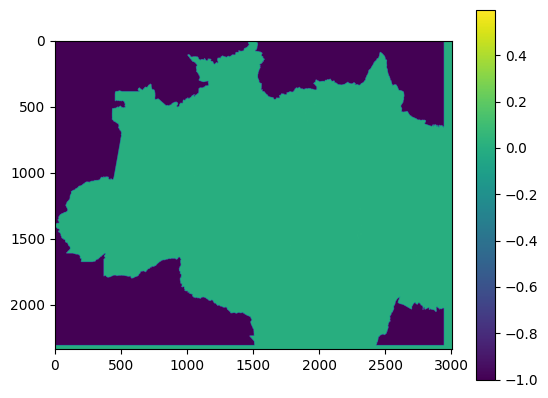

In [10]:
# img_reconstructed = img_reconstructed[:deter_img_sample.shape[0], :deter_img_sample.shape[1]]
print(img_reconstructed.shape)

plt.imshow(img_reconstructed)
plt.colorbar()
plt.show()

In [26]:
patches = []
for t in range(0, deter_img.shape[0]):
    print(t)
    img = deter_img[t]
    patches_t = extract_sorted_patches(img, patch_size=64)
    patches.append(patches_t)
    # plt.imshow(img)
    # plt.colorbar()
    # plt.show()
    
patches = np.stack(patches, axis=0)
print(patches.shape)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
(48, 1656, 64, 64)


In [27]:
patches_mask = []
print(mask.shape)
# for t in range(0, mask.shape[0]):
# print(t)
# img = mask[t]
print(img.shape)
patches_t = extract_sorted_patches(mask, patch_size=64)
patches_mask.append(patches_t)
    
patches_mask = np.stack(patches_mask, axis=0)
print(patches_mask.shape)

(2333, 3005)
(2333, 3005)
(1, 1656, 64, 64)


In [28]:
print(patches.shape)

(48, 1656, 64, 64)


In [29]:
from preprocess import divide_pred_windows

patches = patches.transpose(1, 0, 2, 3)
windowed_patches, _, indexes = divide_pred_windows(patches, min_def=0, window_size=6, mask_patches=patches_mask[0])

print(windowed_patches.shape)


Dividing in prediction windows:   0%|          | 0/71208 [00:00<?, ?it/s]/home/thiago/python-envs/base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/thiago/python-envs/base/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
Dividing in prediction windows: 100%|██████████| 71208/71208 [00:05<00:00, 12247.03it/s]


0 Skipped Images
(71208, 6, 64, 64)


In [12]:
print(indexes)
print(len(indexes))

[(0, 0, 6), (0, 1, 7), (0, 2, 8), (0, 3, 9), (0, 4, 10), (0, 5, 11), (0, 6, 12), (0, 7, 13), (0, 8, 14), (0, 9, 15), (0, 10, 16), (0, 11, 17), (0, 12, 18), (0, 13, 19), (0, 14, 20), (0, 15, 21), (0, 16, 22), (0, 17, 23), (0, 18, 24), (0, 19, 25), (0, 20, 26), (0, 21, 27), (0, 22, 28), (0, 23, 29), (0, 24, 30), (0, 25, 31), (0, 26, 32), (0, 27, 33), (0, 28, 34), (0, 29, 35), (0, 30, 36), (0, 31, 37), (0, 32, 38), (0, 33, 39), (0, 34, 40), (0, 35, 41), (0, 36, 42), (0, 37, 43), (0, 38, 44), (0, 39, 45), (0, 40, 46), (0, 41, 47), (0, 42, 48), (1, 0, 6), (1, 1, 7), (1, 2, 8), (1, 3, 9), (1, 4, 10), (1, 5, 11), (1, 6, 12), (1, 7, 13), (1, 8, 14), (1, 9, 15), (1, 10, 16), (1, 11, 17), (1, 12, 18), (1, 13, 19), (1, 14, 20), (1, 15, 21), (1, 16, 22), (1, 17, 23), (1, 18, 24), (1, 19, 25), (1, 20, 26), (1, 21, 27), (1, 22, 28), (1, 23, 29), (1, 24, 30), (1, 25, 31), (1, 26, 32), (1, 27, 33), (1, 28, 34), (1, 29, 35), (1, 30, 36), (1, 31, 37), (1, 32, 38), (1, 33, 39), (1, 34, 40), (1, 35, 41), 

In [11]:
div_time = windowed_patches.shape[0] // 43
print(div_time)

NameError: name 'windowed_patches' is not defined

In [16]:
print(indexes[-1])
print(indexes[0], indexes[42])

(1655, 42, 48)
(0, 0, 6) (0, 42, 48)


In [12]:
patches_t = []
# 42 - 4 = 38
# 48 - 4 = 44
temporal_index = 43
div_time = windowed_patches.shape[0] // temporal_index

patches = []
for i in range(0, div_time):
    windowed_patch = windowed_patches[i * temporal_index: (i + 1) * temporal_index]
    print(windowed_patch.shape)
    # windowed_indexes = indexes[i * 46: (i + 1) * 46]
    
    init_patches = windowed_patch[0]
    print(init_patches.shape)
    non_duplicated = windowed_patch[1:, -1]
    print(init_patches.shape)
    print(non_duplicated.shape)
    patches_t = np.concatenate((init_patches, non_duplicated), axis=0)
    print(patches_t.shape)
    # patches = np.concatenate((patches, np.expand_dims(patches_t, axis=0)), axis=0)
    patches.append(patches_t)
    # print(patches.shape)
patches = np.stack(patches, axis=0)
print(patches.shape)

NameError: name 'windowed_patches' is not defined

In [31]:
img_reconstructed = reconstruct_sorted_patches(patches[:, 0], (2333, 3005), patch_size=64)

0 0 0
(64, 64)
(64, 64)
1 0 64
(64, 64)
(64, 64)
2 0 128
(64, 64)
(64, 64)
3 0 192
(64, 64)
(64, 64)
4 0 256
(64, 64)
(64, 64)
5 0 320
(64, 64)
(64, 64)
6 0 384
(64, 64)
(64, 64)
7 0 448
(64, 64)
(64, 64)
8 0 512
(64, 64)
(64, 64)
9 0 576
(64, 64)
(64, 64)
10 0 640
(64, 64)
(64, 64)
11 0 704
(64, 64)
(64, 64)
12 0 768
(64, 64)
(64, 64)
13 0 832
(64, 64)
(64, 64)
14 0 896
(64, 64)
(64, 64)
15 0 960
(64, 64)
(64, 64)
16 0 1024
(64, 64)
(64, 64)
17 0 1088
(64, 64)
(64, 64)
18 0 1152
(64, 64)
(64, 64)
19 0 1216
(64, 64)
(64, 64)
20 0 1280
(64, 64)
(64, 64)
21 0 1344
(64, 64)
(64, 64)
22 0 1408
(64, 64)
(64, 64)
23 0 1472
(64, 64)
(64, 64)
24 0 1536
(64, 64)
(64, 64)
25 0 1600
(64, 64)
(64, 64)
26 0 1664
(64, 64)
(64, 64)
27 0 1728
(64, 64)
(64, 64)
28 0 1792
(64, 64)
(64, 64)
29 0 1856
(64, 64)
(64, 64)
30 0 1920
(64, 64)
(64, 64)
31 0 1984
(64, 64)
(64, 64)
32 0 2048
(64, 64)
(64, 64)
33 0 2112
(64, 64)
(64, 64)
34 0 2176
(64, 64)
(64, 64)
35 0 2240
(64, 64)
(64, 64)
36 0 2304
(64, 64)
(6

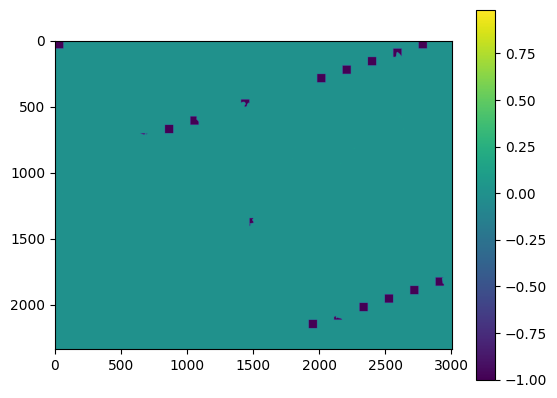

In [32]:
plt.imshow(img_reconstructed)
plt.colorbar()
plt.show()

In [2]:
import numpy as np
import matplotlib.pyplot as plt

img_reconstructed = np.load('/home/thiago/AmazonDeforestation_Research/AmazonDeforestation_Prediction/data/reconstructed_images.npy')
print(img_reconstructed.shape)

(44, 2333, 3005)


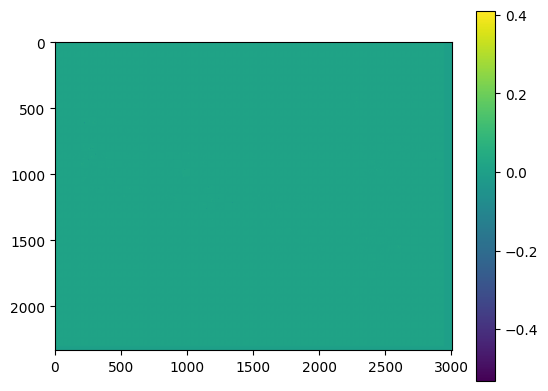

In [3]:
plt.imshow(img_reconstructed[9])
plt.colorbar()
plt.show()

In [5]:
from preprocess import load_tif_image, preprocess_patches, divide_pred_windows
import os
# import numpy as np
# from osgeo import gdal
import matplotlib.pyplot as plt

# patch_size = 64
# xcut = (deter_img.shape[1] // patch_size) * patch_size
# ycut = (deter_img.shape[2] // patch_size) * patch_size

# deter_img_sample = deter_img_sample[:xcut, :ycut]
deter_img = load_tif_image('data/DETER/deter_increments_1km_1week.tif')
# deter_img = deter_img[:48]
print(deter_img.shape)

mask = load_tif_image('data/IBAMA_INPE/1K/tiff_filled/mask.tif')
deter_img[deter_img > 0] = 1

(207, 2333, 3005)


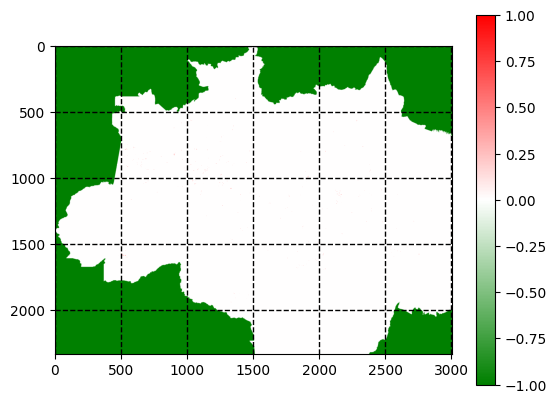

In [31]:
deter_img_sample = deter_img[190]
mask = mask[:deter_img_sample.shape[0], :deter_img_sample.shape[1]]
deter_img_sample[mask == 0] = -1

# Create a colormap where 0 is mapped to white and 1 is mapped to red
cmap = plt.cm.colors.LinearSegmentedColormap.from_list("", ["green", "white", "red"])

plt.imshow(deter_img_sample, cmap=cmap, vmin=-1, vmax=1)
plt.grid(True, color=(0, 0, 0, 0.1), linestyle='--', linewidth=1)  # Add grid
plt.colorbar()
plt.show()